In [1]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_json('tops_fashion.json')
data

asin author                         availability  \
0       B016I2TS4W   None                                 None   
1       B01N49AI08   None                                 None   
2       B01JDPCOHO   None                                 None   
3       B01N19U5H5   None                                 None   
4       B004GSI2OS   None  Usually ships in 6-10 business days   
5       B00TAEHGGS   None                                 None   
6       B012YX2ZPI   None   Usually ships in 4-5 business days   
7       B074GPTP3J   None                                 None   
8       B06Y2LCC5S   None                                 None   
9       B00T9W4E66   None                                 None   
10      B073Y91FTS   None                                 None   
11      B001LOUGE4   None                                 None   
12      B0751PWCP7   None                                 None   
13      B0747M995P   None                                 None   
14      B01LQAINPG   None                                 None   
15      B003BSRPB0   None  Usually ships in 6-10 business days   
16      B00L3C0O2S   None                                 None   
17      B00XIM7A1Y   None                                 None   
18      B06XKGTX6F   None                                 None   
19      B01HMCZP80   None                                 None   
20      B00XGI2REA   None                                 None   
21      B014ICEDNA   None   Usually ships in 4-5 business days   
22      B01KKVZM88   None                                 None   
23      B01N8YY9G1   None                                 None   
24      B071FKC36P   None                                 None   
25      B009W1HUG0   None                                 None   
26      B073S96HSS   None                                 None   
27      B014ICEJ1Q   None   Usually ships in 4-5 business days   
28      B074DF831N   None                                 None   
29      B01GE1M4M0   None                                 None   
...            ...    ...                                  ...   
183108  B06WLNR267   None  Usually ships in 6-10 business days   
183109  B010R8I8NA   None   Usually ships in 1-2 business days   
183110  B073YGRLSM   None   Usually ships in 2-3 business days   
183111  B06XJ24BWH   None                                 None   
183112  B06XY2DZCT   None                                 None   
183113  B01A51IYDI   None                                 None   
183114  B07579G728   None                                 None   
183115  B071D9X1S9   None                                 None   
183116  B0749B51LK   None                                 None   
183117  B01MS41A4S   None                                 None   
183118  B01LSBZB8A   None                                 None   
183119  B06W53LT7P   None                                 None   
183120  B01NCO06S0   None   Usually ships in 1-2 business days   
183121  B074PNHL3P   None                                 None   
183122  B073PYBR49   None                                 None   
183123  B073GH8CKH   None                                 None   
183124  B01AVN150E   None   Usually ships in 1-2 business days   
183125  B073HZ4BLC   None                                 None   
183126  B073N5YT66   None                                 None   
183127  B00CAOHGO2   None                                 None   
183128  B01IWXIBNO   None                                 None   
183129  B06XVRZBDL   None                                 None   
183130  B074VX7YVN   None                                 None   
183131  B071V9D3MH   None                                 None   
183132  B074GSTF5S   None                                 None   
183133  B01MSALTSO   None   Usually ships in 1-2 business days   
183134  B015W98YQK   None                                 None   
183135  B075756PGC   None                                 None   
183136  B074L8FVTT   None   Usually ships in 2-3 busin

In [3]:
print(data.shape[0],data.shape[1])

183138 19


In [4]:
data.columns

Index(['asin', 'author', 'availability', 'availability_type', 'brand', 'color',
       'editorial_reivew', 'editorial_review', 'formatted_price',
       'large_image_url', 'manufacturer', 'medium_image_url', 'model',
       'product_type_name', 'publisher', 'reviews', 'sku', 'small_image_url',
       'title'],
      dtype='object')

In [5]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [6]:
data.head()

asin         brand              color  \
0  B016I2TS4W         FNC7C               None   
1  B01N49AI08  FIG Clothing               None   
2  B01JDPCOHO  FIG Clothing               None   
3  B01N19U5H5       Focal18               None   
4  B004GSI2OS   FeatherLite  Onyx Black/ Stone   

                                    medium_image_url product_type_name  \
0  https://images-na.ssl-images-amazon.com/images...             SHIRT   
1  https://images-na.ssl-images-amazon.com/images...             SHIRT   
2  https://images-na.ssl-images-amazon.com/images...             SHIRT   
3  https://images-na.ssl-images-amazon.com/images...             SHIRT   
4  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                               title formatted_price  
0  Minions Como Superheroes Ironman Long Sleeve R...            None  
1                      FIG Clothing Womens Izo Tunic            None  
2                        FIG Clothing Womens Won Top            None  
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...            None  
4  Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26

In [7]:
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [8]:
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [9]:
product_type_count = Counter((data['product_type_name']))
(product_type_count.most_common(10))

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [10]:
data['brand'].describe()

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

In [11]:
brand_count = Counter((data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [12]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [13]:
color_count = Counter(data['color'])
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [14]:
data['formatted_price'].describe()

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object

In [15]:
price_count = Counter(data['formatted_price'])
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [16]:
data['title'].describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [17]:
data.to_pickle('pickles/180k_apparel_data')

In [18]:
data = data.loc[~data['formatted_price'].isnull()]
data.shape[0]

28395

In [19]:
data = data.loc[~data['color'].isnull()]
data.shape[0]

28385

In [20]:
data.to_pickle('pickles/28k_apparel_data')

In [21]:
# You can download all these 28k images using this code below.
# You do NOT need to run this code and hence it is commented.


'''
from PIL import Image
import requests
from io import BytesIO

for index, row in images.iterrows():
        url = row['large_image_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save('images/28k_images/'+row['asin']+'.jpeg')


'''

"\nfrom PIL import Image\nimport requests\nfrom io import BytesIO\n\nfor index, row in images.iterrows():\n        url = row['large_image_url']\n        response = requests.get(url)\n        img = Image.open(BytesIO(response.content))\n        img.save('images/28k_images/'+row['asin']+'.jpeg')\n\n\n"

In [22]:
data = pd.read_pickle('pickles/28k_apparel_data')
(data.duplicated('title'))
print(sum(data.duplicated('title')))

2325


In [23]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
6   Women's Unique 100% Cotton T - Special Olympic...           $9.99  
11             Ladies Cotton Tank 2x1 Ribbed Tank Top          $11.99  
15  FeatherLite Ladies' Moisture Free Mesh Sport S...          $20.54  
21  Supernatural Chibis Sam Dean And Castiel Short...           $7.50

In [24]:
#Remove all products with very few words in title
data_sorted = data[data['title'].apply(lambda x : len(x.split()) > 4)]
data_sorted.shape



(27949, 7)

In [25]:
#Sort the whole data based on title (alphabetical order of title)
data_sorted.sort_values('title', inplace = True, ascending = False)

In [26]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

indices

[61973,
 133820,
 81461,
 75995,
 151570,
 152506,
 76209,
 103647,
 138588,
 95954,
 74338,
 18905,
 60078,
 59030,
 177229,
 22273,
 135865,
 171318,
 44082,
 40331,
 60603,
 56982,
 39370,
 120006,
 8424,
 139484,
 94413,
 167267,
 92382,
 93518,
 101522,
 74087,
 51286,
 35796,
 73818,
 127730,
 37902,
 164994,
 125784,
 129103,
 161966,
 151598,
 100567,
 102610,
 80880,
 74066,
 167810,
 100898,
 86604,
 153020,
 168828,
 97684,
 83173,
 37290,
 17234,
 130798,
 128762,
 38107,
 32240,
 141241,
 37911,
 142996,
 115660,
 163170,
 73633,
 132135,
 42468,
 69292,
 32217,
 169883,
 108966,
 68893,
 115422,
 141090,
 80785,
 92051,
 165541,
 150090,
 163741,
 123456,
 57588,
 116686,
 170034,
 160212,
 144984,
 142244,
 141432,
 118353,
 101884,
 110314,
 140321,
 76493,
 135579,
 85390,
 78409,
 158069,
 148089,
 100597,
 140457,
 137999,
 147641,
 94653,
 120825,
 145597,
 114795,
 98140,
 148772,
 80202,
 113184,
 79120,
 93161,
 86422,
 103918,
 157939,
 99504,
 85577,
 133860,
 

In [27]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    previous_i = i
    
    a = data['title'].loc[indices[i]].split()
    
    j = i+1
    
    while j< num_data_points:
        
        b = data['title'].loc[indices[j]].split()
        
        length = max(len(a), len(b))
        
        count = 0;
        
        for k in itertools.zip_longest(a,b):
            if(k[0] == k[1]):
                count+=1
        
        if ( length-count) > 2:
            
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
        
            if j == num_data_points-1:
                stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
                
            i = j
            break
            
        else:
            j += 1
        
    if previous_i == i:
        break
        

In [28]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [29]:
data.shape

(17593, 7)

In [30]:
data.to_pickle('pickles/17k_apperal_data')

In [31]:
data = pd.read_pickle('pickles/17k_apperal_data')

In [32]:
indices = []
for i,row in data.iterrows():
    indices.append(i)


stage2_dedupe_asins = []
while len(indices) != 0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    
    a = data['title'].loc[i].split()
    
    for j in indices:
        
        b = data['title'].loc[j].split()
        
        
        length = max(len(a), len(b))
        
        count = 0
        
        for k in itertools.zip_longest(a,b):
            if( k[0] == k[1]):
                count+=1
        
        if (length - count) < 3:
            indices.remove(j)
        
        
        
        
        

In [33]:
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [34]:
data.shape

(16435, 7)

In [35]:
data.to_pickle('pickles/16k_apperal_data')

# Text Processing

In [36]:
data = pd.read_pickle('pickles/16k_apperal_data')

In [37]:
stop_words = set(stopwords.words('english'))
print("list of stop words : ", stop_words)

def nlp_preprocessing(total_text , index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            word = word.lower()
            
            if not word in stop_words:
                string += word + " "
            
        data[column][index] = string

list of stop words :  {'until', 'i', 'haven', 'on', 'but', 'shan', 'doesn', 'we', 'hadn', "you've", 'above', 'out', 'same', 'where', 'as', "you'd", 're', 'have', 'these', 'with', 't', 'by', 'both', 'this', 'their', 'ourselves', "hasn't", "wouldn't", 'was', 'yourself', 'and', 'did', 'in', 'why', 'how', 'being', 'all', "she's", 'more', 'our', 'or', 'wouldn', 'doing', 'yourselves', 'under', 'over', 'further', 'those', 'do', 'from', 'so', 'which', "you'll", 'that', 'after', 'up', 'below', 'his', 'herself', 'will', 'were', 'no', 'wasn', 'through', 'for', 'is', "should've", "hadn't", 'couldn', 'who', 'me', 'what', "don't", 'does', 'during', 'didn', 'when', 'only', "couldn't", 'theirs', 'ain', 'yours', 'then', 'to', 'you', 'mightn', "that'll", 'needn', 'very', 'll', 'an', 'again', 'a', 'once', 'himself', 'than', 'whom', 'few', "mustn't", "wasn't", 'him', 'isn', 'her', 'hasn', 'while', 'd', 'my', 'aren', 'won', 'are', 'about', 'not', 'been', 'had', "isn't", "mightn't", 'should', 'your', 'its',

In [38]:
start_time = time.clock()

for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

print(time.clock() - start_time, " seconds")

7.216746999999941  seconds


In [39]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [40]:
data.to_pickle('pickles/16k_apperal_data_preprocessed')

# Stemming
### stemming doesn't work very well

# Text based product similarity

In [41]:
data = pd.read_pickle('pickles/16k_apperal_data_preprocessed')
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [42]:


#Display an image

def display_img(url, ax, fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    
#plotting code to understand the algo's decision
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()

def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)


# Bag of Words (BoW) on product titles

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['title'])
title_features.shape

(16435, 12684)

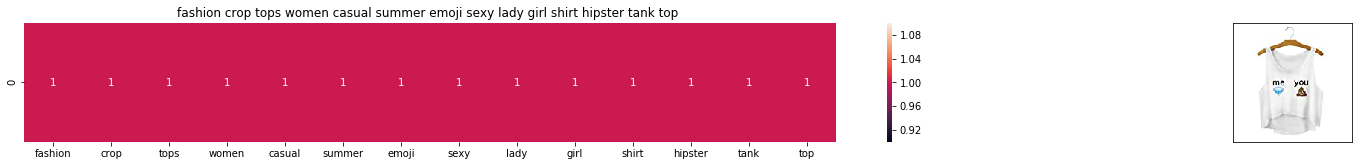

ASIN : B010V3B44G
Brand: Doxi Supermall
Title: fashion crop tops women casual summer emoji sexy lady girl shirt hipster tank top 
Euclidean similarity with the query image : 0.0


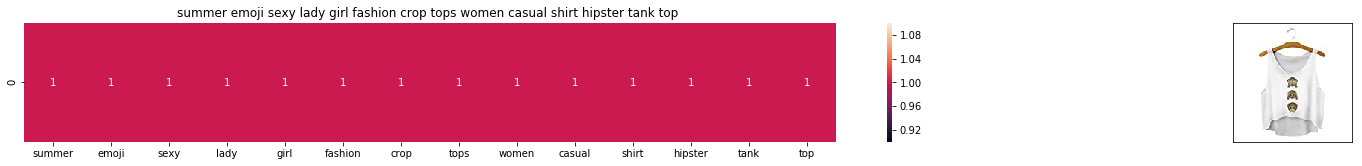

ASIN : B010V3BDII
Brand: Doxi Supermall
Title: summer emoji sexy lady girl fashion crop tops women casual shirt hipster tank top 
Euclidean similarity with the query image : 0.0


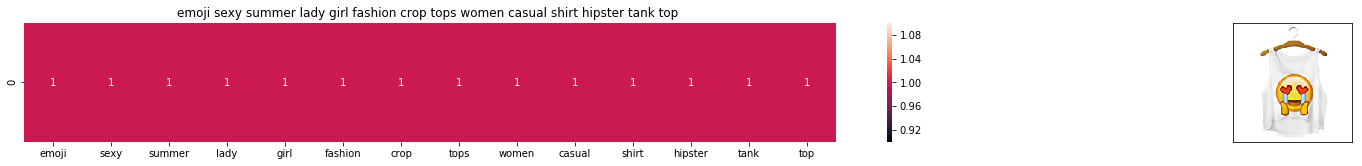

ASIN : B010V3BLWQ
Brand: Doxi Supermall
Title: emoji sexy summer lady girl fashion crop tops women casual shirt hipster tank top 
Euclidean similarity with the query image : 0.0


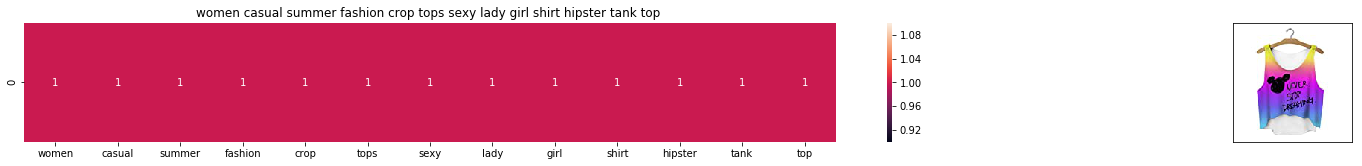

ASIN : B010V3AYSS
Brand: Doxi Supermall
Title: women casual summer fashion crop tops sexy lady girl shirt hipster tank top 
Euclidean similarity with the query image : 1.0


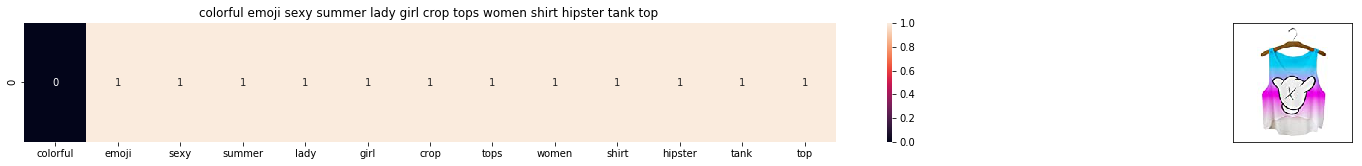

ASIN : B010V3BQZS
Brand: Doxi Supermall
Title: colorful emoji sexy summer lady girl crop tops women shirt hipster tank top 
Euclidean similarity with the query image : 1.7320508075688772


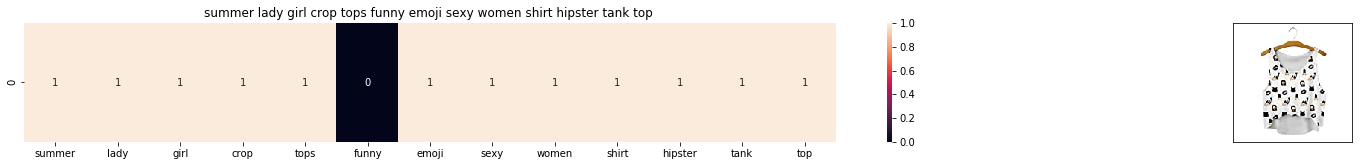

ASIN : B010V3BVMQ
Brand: Doxi Supermall
Title: summer lady girl crop tops funny emoji sexy women shirt hipster tank top 
Euclidean similarity with the query image : 1.7320508075688772


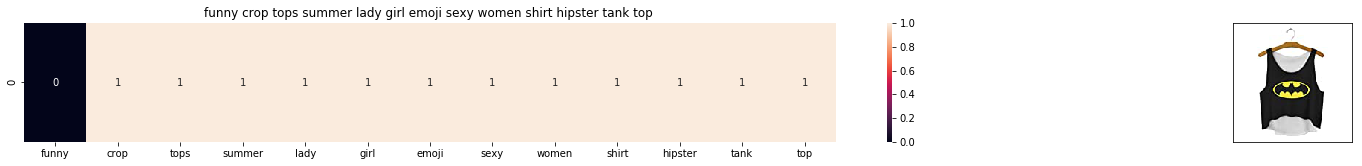

ASIN : B010V3C116
Brand: Doxi Supermall
Title: funny crop tops summer lady girl emoji sexy women shirt hipster tank top 
Euclidean similarity with the query image : 1.7320508075688772


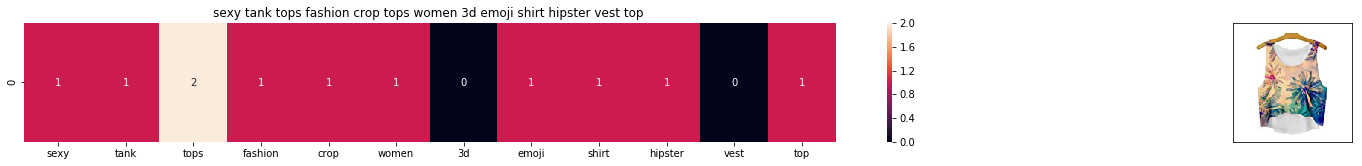

ASIN : B010V3DB9C
Brand: Doxi Supermall
Title: sexy tank tops fashion crop tops women 3d emoji shirt hipster vest top 
Euclidean similarity with the query image : 2.6457513110645907


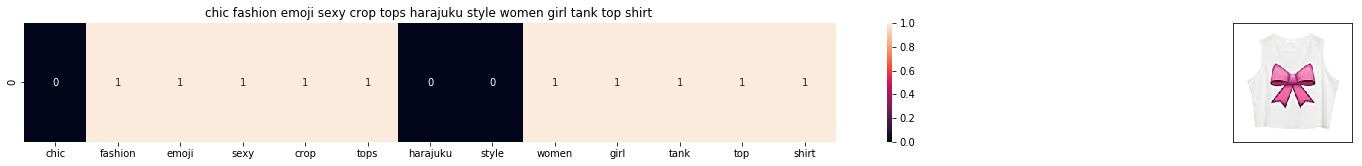

ASIN : B011RCJPR8
Brand: Chiclook Cool
Title: chic fashion emoji sexy crop tops harajuku style women girl tank top shirt 
Euclidean similarity with the query image : 2.6457513110645907


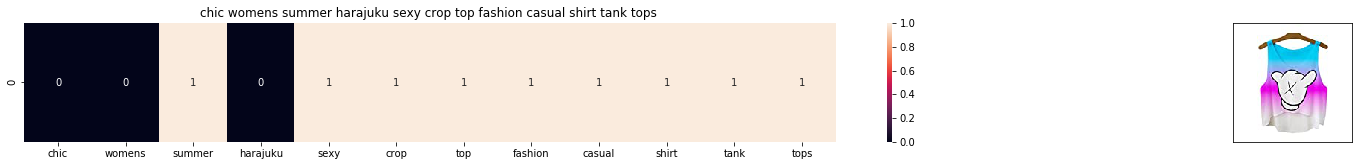

ASIN : B011RCJEMO
Brand: Chiclook Cool
Title: chic womens summer harajuku sexy crop top fashion casual shirt tank tops 
Euclidean similarity with the query image : 2.8284271247461903


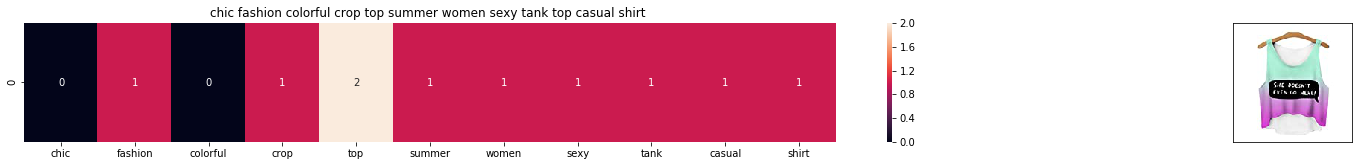

ASIN : B011RCJ6UE
Brand: Chiclook Cool
Title: chic fashion colorful crop top summer women sexy tank top casual shirt 
Euclidean similarity with the query image : 2.8284271247461903


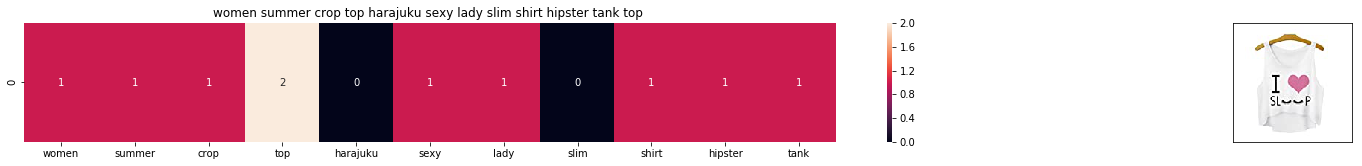

ASIN : B010V3EDEE
Brand: Doxi Supermall
Title: women summer crop top harajuku sexy lady slim shirt hipster tank top 
Euclidean similarity with the query image : 2.8284271247461903


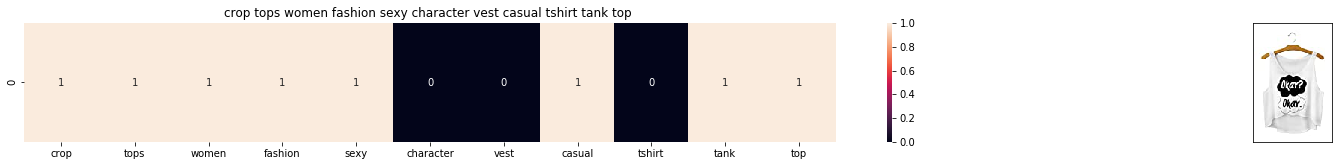

ASIN : B0107UEPVM
Brand: Mang GO
Title: crop tops women fashion sexy character vest casual tshirt tank top 
Euclidean similarity with the query image : 3.0


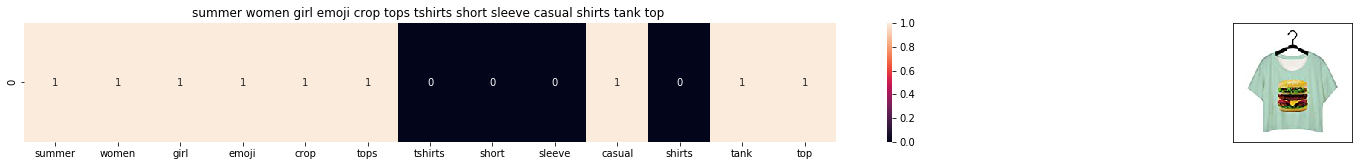

ASIN : B0124ECIU4
Brand: Doxi Supermall
Title: summer women girl emoji crop tops tshirts short sleeve casual shirts tank top 
Euclidean similarity with the query image : 3.0


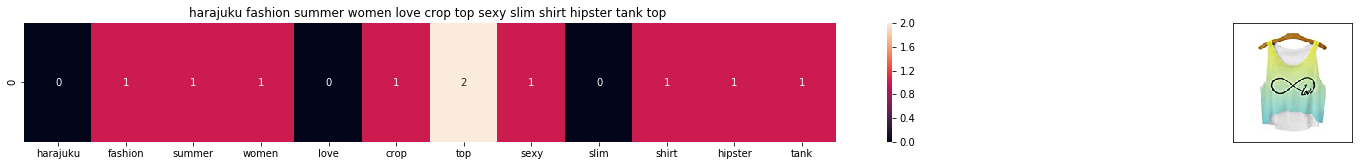

ASIN : B010V35OBU
Brand: Doxi Supermall
Title: harajuku fashion summer women love crop top sexy slim shirt hipster tank top 
Euclidean similarity with the query image : 3.0


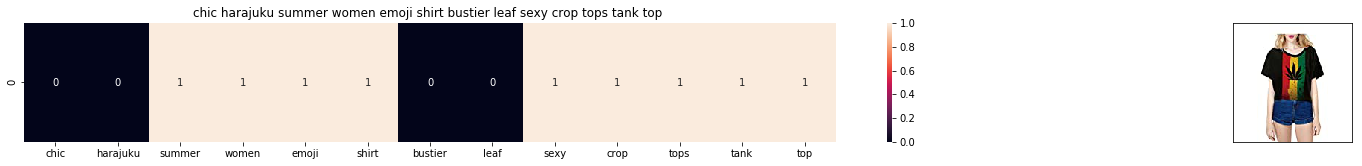

ASIN : B011UEXGH8
Brand: Chiclook Cool
Title: chic harajuku summer women emoji shirt bustier leaf sexy crop tops tank top 
Euclidean similarity with the query image : 3.0


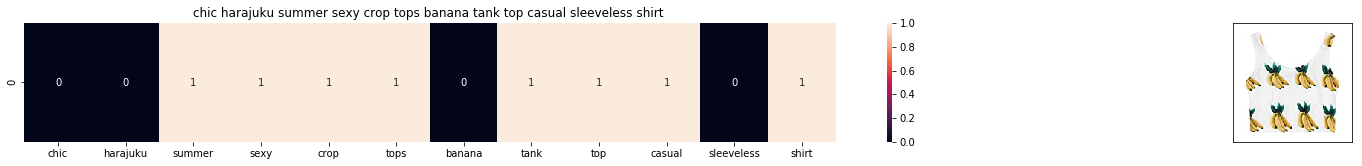

ASIN : B011RCIQBE
Brand: Chiclook Cool
Title: chic harajuku summer sexy crop tops banana tank top casual sleeveless shirt 
Euclidean similarity with the query image : 3.1622776601683795


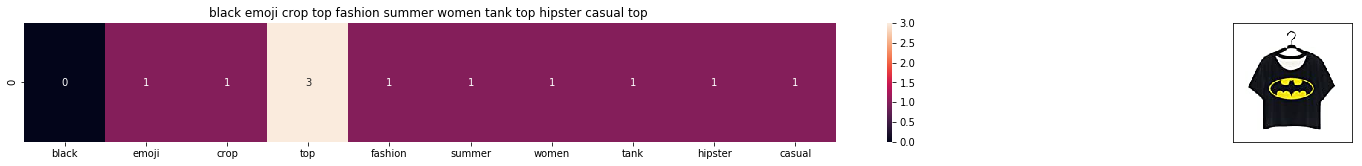

ASIN : B0124E80M4
Brand: Doxi Supermall
Title: black emoji crop top fashion summer women tank top hipster casual top 
Euclidean similarity with the query image : 3.1622776601683795


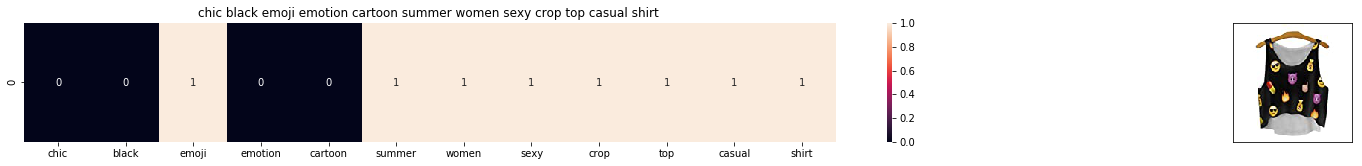

ASIN : B011RCJ4M4
Brand: Chiclook Cool
Title: chic black emoji emotion cartoon summer women sexy crop top casual shirt 
Euclidean similarity with the query image : 3.1622776601683795


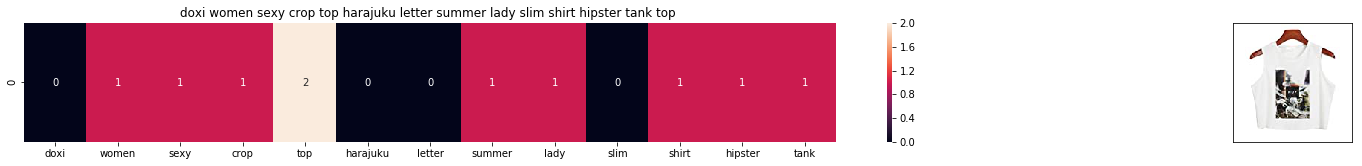

ASIN : B010V39146
Brand: Doxi Supermall
Title: doxi women sexy crop top harajuku letter summer lady slim shirt hipster tank top 
Euclidean similarity with the query image : 3.1622776601683795


In [44]:
def bag_of_words_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features, title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

        
        
bag_of_words_model(12566, 20)
    
    

In [45]:
   '''
    pairwise_dist = pairwise_distances(title_features, title_features[27])
    pairwise_dist
   
   '''

'\n pairwise_dist = pairwise_distances(title_features, title_features[27])\n pairwise_dist\n\n'

# TF-IDF based product similarity

In [46]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

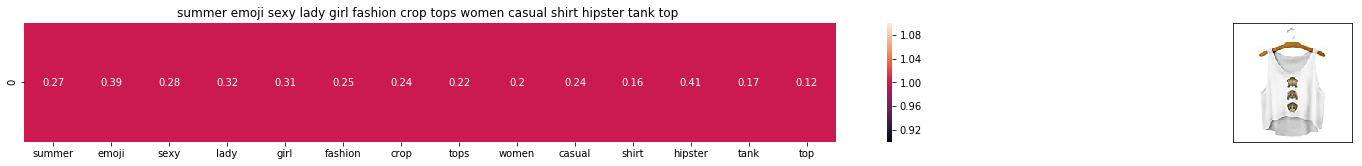

ASIN : B010V3BDII
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


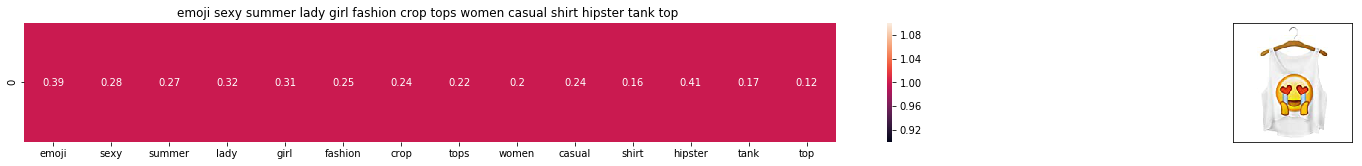

ASIN : B010V3BLWQ
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


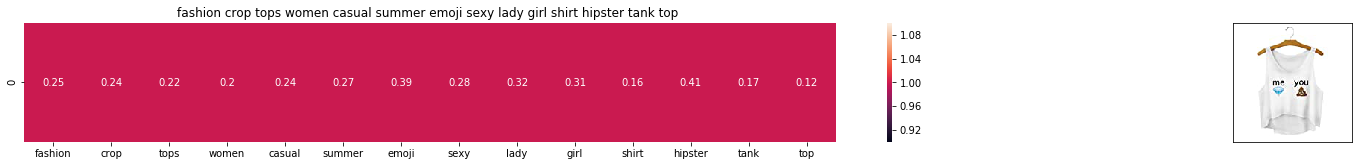

ASIN : B010V3B44G
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


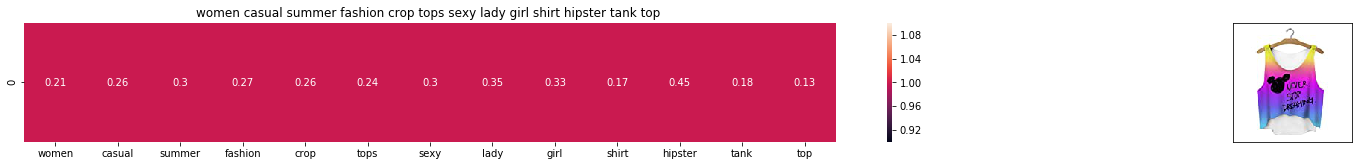

ASIN : B010V3AYSS
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.40138594750234946


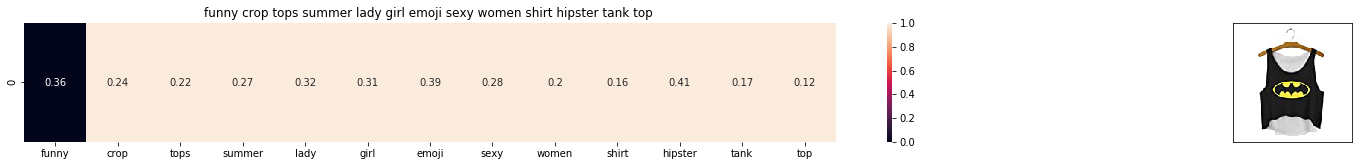

ASIN : B010V3C116
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.4954421553895553


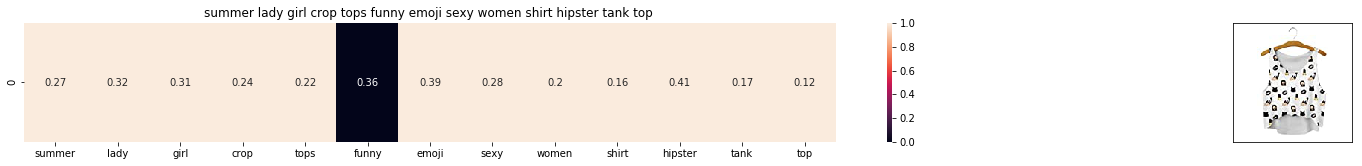

ASIN : B010V3BVMQ
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.4954421553895553


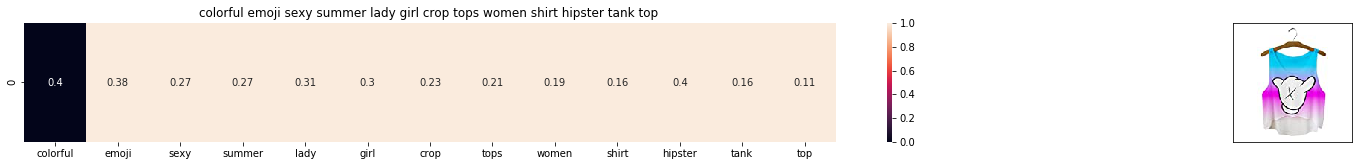

ASIN : B010V3BQZS
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.5241689140292635


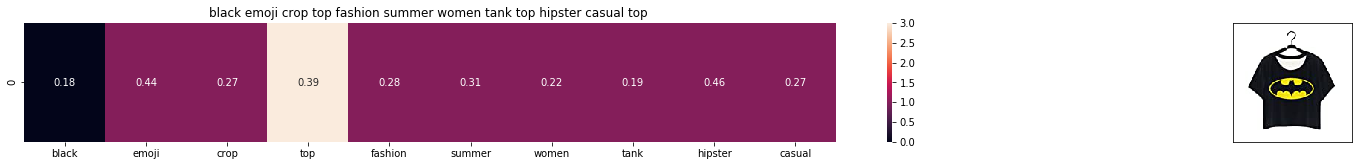

ASIN : B0124E80M4
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.6841581626642753


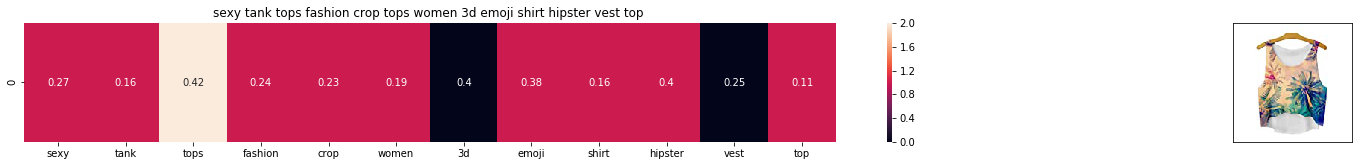

ASIN : B010V3DB9C
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.7731343455110793


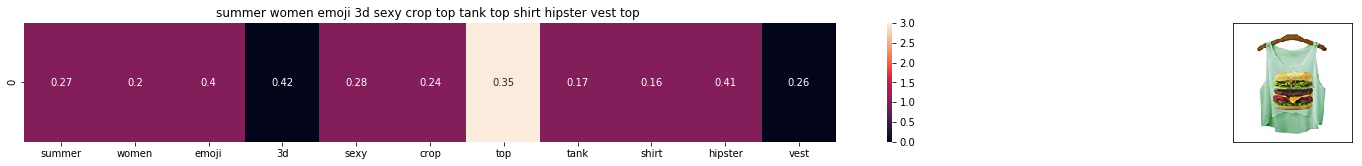

ASIN : B010V3E5EC
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.8128754313990525


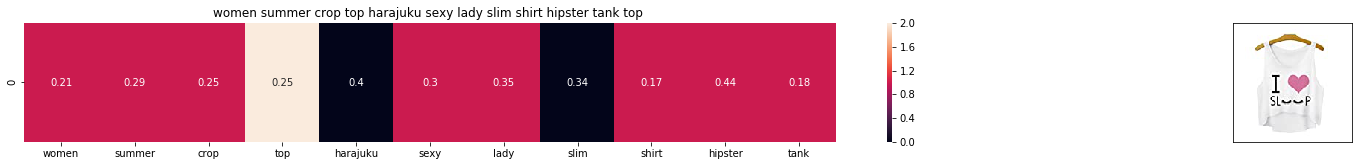

ASIN : B010V3EDEE
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.8437056912864757


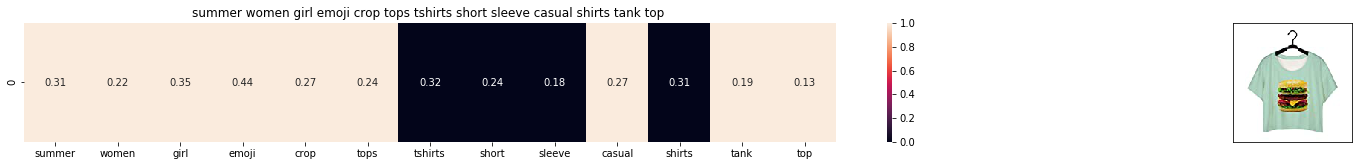

ASIN : B0124ECIU4
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.8553483954246196


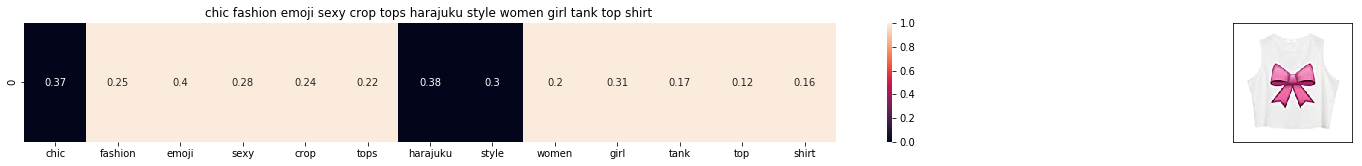

ASIN : B011RCJPR8
BRAND : Chiclook Cool
Eucliden distance from the given image : 0.8826321316686155


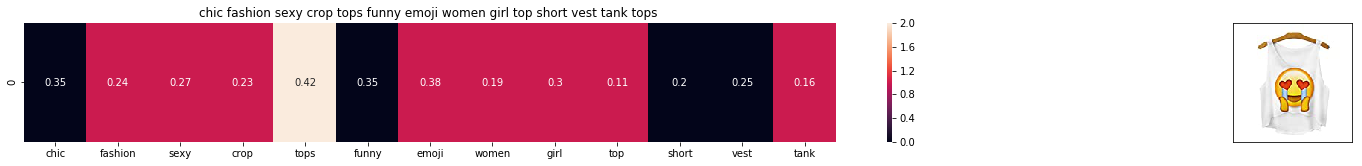

ASIN : B011RCJH58
BRAND : Chiclook Cool
Eucliden distance from the given image : 0.900401746801386


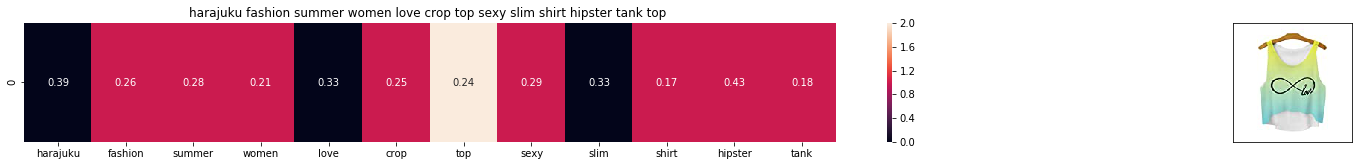

ASIN : B010V35OBU
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9172816572673459


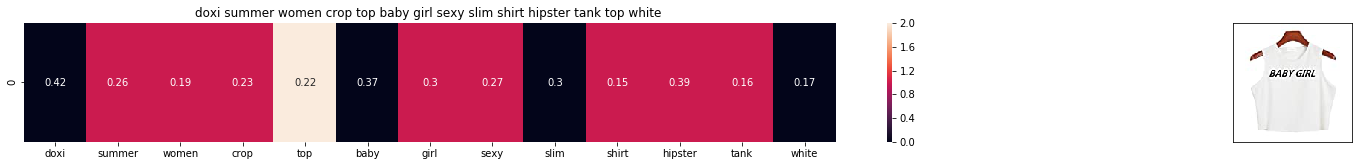

ASIN : B010V3A23U
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9303848929561549


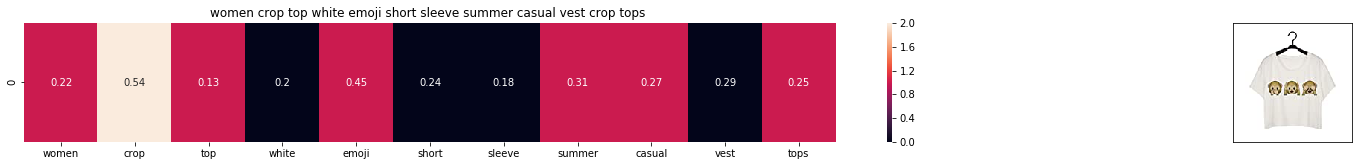

ASIN : B0124E7MHS
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9334421080980748


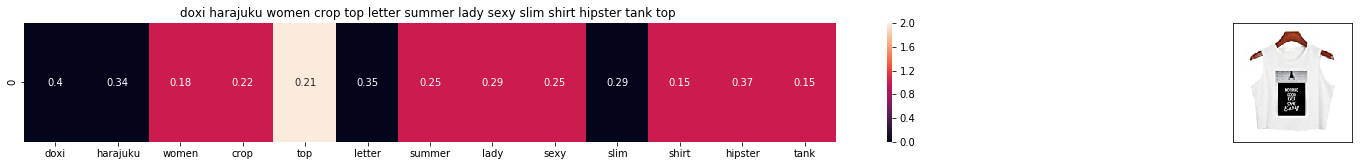

ASIN : B010V380LQ
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9525344637195033


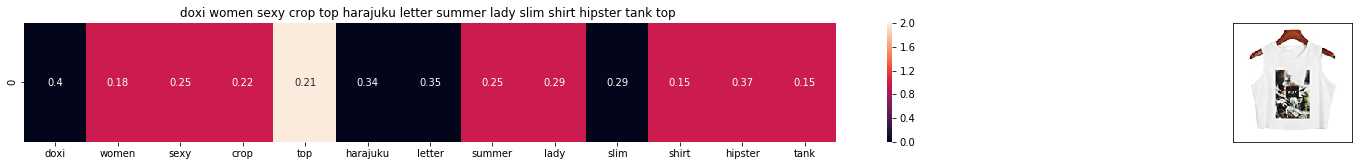

ASIN : B010V39146
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9525344637195033


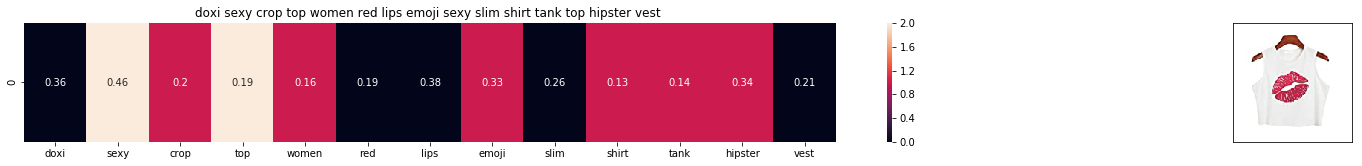

ASIN : B010TKXEHG
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9560708174154958


In [47]:
def tfidf_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(tfidf_title_features, tfidf_title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
    
tfidf_model(12566, 20)    